# Introductory data analysis for the Locust Hanger experiment
This notebook is intended as a tutorial style introduction for the VTK students (Dec 2022) to exploratory data analysis. 

## Importing packages, loading data

In [1]:
# We start by importing all the necessary packages

import pandas as pd  #The main package we will be using for data analysis. Used to read CSVs/TSVs, work with dataframe objects, and many other things.
import matplotlib.pyplot as plt  #The standard plotting package, used for making nice pretty pictures.
import os  #We might need this to deal with filenames and paths.
import random  #Used to generate random numbers
import numpy as np  #We might need this, it's a pretty standard package. 
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Put the location of the data folder on your computer
data_location = 'D:/Data/Hangar-Locust/'

In [3]:
# Reads the .tsv file as a pandas DataFrame. We skip the first 11 rows because that is the metadata at the start, and we choose the Time column to be our index column. 
df = pd.read_csv(data_location + '2K-locust_14112022/200_locust_11142022_0002.tsv', sep='\t', skiprows=11, index_col='Time')

## Cleaning and augmenting data

In [4]:
# Print the first 10 rows of our dataframe. Note that Jupyter will automatically print the last line of a cell, so you don't need to type print(df.head(10))
df.head(10)

,Frame,X,Y,Z,X.1,Y.1,Z.1,X.2,Y.2,Z.2,...,X.1297,Y.1297,Z.1297,X.1298,Y.1298,Z.1298,X.1299,Y.1299,Z.1299,Unnamed: 3902
Time,,,,,,,,,,,,,,,,,,,,,
0.00,1,1537.634,2943.620,371.787,574.688,10.452,50.055,200.860,2469.208,358.624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,2,1537.635,2943.619,371.791,574.685,10.449,50.040,200.857,2469.210,358.608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,3,1537.634,2943.615,371.800,574.678,10.445,50.031,200.856,2469.212,358.605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.03,4,1537.637,2943.622,371.795,574.683,10.445,50.013,200.860,2469.209,358.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,5,1537.691,2943.882,370.912,574.651,10.268,49.610,200.787,2469.282,358.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,6,1537.698,2943.900,370.847,574.685,10.241,49.528,200.765,2469.294,357.973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.06,7,1537.690,2943.911,370.825,574.706,10.227,49.504,200.759,2469.301,357.933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.07,8,1537.688,2943.911,370.813,574.701,10.224,49.475,200.756,2469.309,357.899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.08,9,1537.696,2943.909,370.782,574.712,10.209,49.444,200.753,2469.308,357.906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# We can access the columns of the dataframe by using df.columns
df.columns

Index(['Frame', ' X', ' Y', ' Z', ' X.1', ' Y.1', ' Z.1', ' X.2', ' Y.2',
       ' Z.2',
       ...
       ' X.1297', ' Y.1297', ' Z.1297', ' X.1298', ' Y.1298', ' Z.1298',
       ' X.1299', ' Y.1299', ' Z.1299', 'Unnamed: 3902'],
      dtype='object', length=3902)

In [6]:
# The command df.info() gives us some useful information about the dataframe. 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 3902 entries, Frame to Unnamed: 3902
dtypes: float64(3901), int64(1)
memory usage: 2.8 GB
None


In [7]:
# We notice that a lot of the entries are NaN. We would like to get rid of the columns where > 90% of the data is NaN. 
# We will create a new dataframe ndf to do this.
ndf = df.copy()

# We want to delete any columns that have more than 90% NaN. 
cols_to_delete = ndf.columns[ndf.isnull().sum()/len(df) > .90]

In [8]:
# It's possible, although unlikely, that the previous command found a column like ' X.420' with more than 90% NaN, but the corresponding columns ' Y.420' and/or ' Z.420' weren't included. 
# To check this, we will go through this list of columns, and check that whenever there is a column there, all three (X,Y, and Z) of them are there. 
# If this is confusing you, feel free to skip it. 
cols_to_delete_list = [int(cols[3:]) for cols in cols_to_delete[:-1]]
everything_ok = True
for col in cols_to_delete_list:
    if (cols_to_delete_list.count(col)) != 3:
        everything_ok = False
if everything_ok == True:
    print('Everything is ok')
else:
    print('Everything is NOT ok')

Everything is ok


In [9]:
# Now we can remove the columns from the dataframe
ndf.drop(cols_to_delete, axis = 1, inplace = True)

In [10]:
# We can now compare the information of the original data frame and the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 3902 entries, Frame to Unnamed: 3902
dtypes: float64(3901), int64(1)
memory usage: 2.8 GB


In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 799 entries, Frame to  Z.1160
dtypes: float64(798), int64(1)
memory usage: 591.9 MB


In [12]:
# It will be useful later to have a list containing all of the numbers of the markers in our dataframe. That is, all the numbers we DIDN'T remove in the previous step. 
# This command creates a list of the numbers that appear in the columns of ndf.columns. It uses list comprehension, so google that if you want to know how this works (it's useful).
marker_labels = [int(cols[3:]) for cols in ndf.columns[4:]]

# Since each number appears in the list three times, it's certainly not a unique list of numbers. 
# We can make it into a unique list of numbers though, by first converting to a set, and then back to a list.
marker_labels = list(set(marker_labels))

# Unfortunately this loses the nice ordering we had, but we can fix that easily enough with a quick sort.
marker_labels = sorted(marker_labels)

In [13]:
# Define subsets of the marker labels corresponding to the x, y, and z coordinates
X_subset = [f' X.{label}' for label in marker_labels]
Y_subset = [f' Y.{label}' for label in marker_labels]
Z_subset = [f' Z.{label}' for label in marker_labels]

In [14]:
# We also want a way of knowing which columns correspond to the arena markers
# First subset those markers that have a Z value above 350, and remove them from the arena_markers dataframe
arena_markers = ndf[Z_subset][ndf[Z_subset] > 350]
arena_null_cols = arena_markers.columns[arena_markers.isnull().all()]
arena_markers.drop(arena_null_cols, axis = 1, inplace = True)
# Then take the columns of the remaining dataframe and turn it into a list
arena_markers = list(arena_markers.columns)
# Then get the numbers of the labels from the column names
arena_marker_labels = [int(label[3:]) for label in arena_markers]
print('The arena labels are: ')
print(arena_marker_labels)

The arena labels are: 
[2, 6, 7, 9, 14, 19, 20, 23, 29]


In [15]:
# We also want a way of knowing which columns correspond to the L markers
# First subset those markers that have an Y value below 500, and remove them from the arena_markers dataframe
L_markers = ndf[Y_subset][ndf[Y_subset] < 500]
L_null_cols = L_markers.columns[L_markers.isnull().all()]
L_markers.drop(L_null_cols, axis = 1, inplace = True)
# Then take the columns of the remaining dataframe and turn it into a list
L_markers = list(L_markers.columns)
# Then get the numbers of the labels from the column names
L_marker_labels = [int(label[3:]) for label in L_markers]
print('The L marker labels are: ')
print(L_marker_labels)

The L marker labels are: 
[1, 15, 103, 113]


In [16]:
# Finally, let's just for completeness define the locust markers as the marker_labels which aren't the arena_labels or the L_labels
locust_labels = np.setdiff1d(marker_labels, arena_marker_labels+L_marker_labels)
locust_labels

array([   3,    4,    8,   10,   11,   12,   13,   16,   17,   18,   25,
         27,   30,   31,   32,   33,   34,   35,   37,   38,   40,   42,
         43,   44,   45,   46,   47,   48,   49,   50,   52,   53,   56,
         57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   67,
         68,   69,   70,   71,   72,   74,   75,   76,   77,   78,   79,
         80,   81,   82,   83,   85,   86,   88,   89,   91,   92,   93,
         94,   95,   97,   98,   99,  100,  101,  102,  105,  107,  110,
        112,  119,  124,  126,  137,  152,  156,  166,  180,  184,  224,
        229,  234,  235,  243,  268,  270,  280,  291,  294,  295,  307,
        316,  319,  335,  341,  343,  345,  350,  356,  360,  365,  366,
        371,  375,  376,  377,  381,  382,  391,  394,  402,  407,  410,
        419,  423,  429,  438,  444,  446,  448,  449,  465,  475,  477,
        480,  483,  484,  487,  492,  494,  508,  510,  517,  518,  521,
        525,  526,  539,  548,  550,  554,  557,  5

In [17]:
# It makes sense to remove these columns from our dataset since they will skew our statistics.
ndf.drop([f' X.{label}' for label in arena_marker_labels+L_marker_labels], axis=1, inplace=True)
ndf.drop([f' Y.{label}' for label in arena_marker_labels+L_marker_labels], axis=1, inplace=True)
ndf.drop([f' Z.{label}' for label in arena_marker_labels+L_marker_labels], axis=1, inplace=True)

In [18]:
# Now we will create three new columns for each marker corresponding to the x, y, and z velocities.

# This will generate a bunch of warnings, probably because this is not the 'best' way to do it. Still, it works, so we won't stress too much. 
# If you want to see all the warnings for some reason, uncomment the warnings part of the import cell and run the notebook again.

for col in ndf.columns[1:]:
#    ndf[f'V{col}'] = ndf[col].shift(-1) - ndf[col]    #Simple shift
#    ndf[f'V{col}'] = 1/2*(ndf[col].shift(-1) - ndf[col].shift(+1))    #Average over 2 simple shifts
    ndf[f'V{col}'] = 1/20*(ndf[col].shift(-10) - ndf[col].shift(+10))    #Average over 20 simple shifts
    

In [19]:
# We want to see the speeds of the locusts as well. Let's add a new column for each locust, containing the speed
for label in locust_labels:
    ndf[f'speed {label}'] = np.sqrt((ndf[f'V X.{label}'])**2 + (ndf[f'V Y.{label}'])**2 + (ndf[f'V Z.{label}'])**2)

In [20]:
# Because there are so many markers, it's difficult to see what's going on if we try to print ndf.head(10)
# Instead, let's just pick one marker, and look at the columns we have available.
# We have: Frame, x position, y position, z position, x velocity, y velocity, z velocity, speed.
LocustNumber = random.choice(locust_labels)
ndf[['Frame', f' X.{LocustNumber}', f' Y.{LocustNumber}', f' Z.{LocustNumber}', f'V X.{LocustNumber}', f'V Y.{LocustNumber}', f'V Z.{LocustNumber}', f'speed {LocustNumber}']].head(10)


,Frame,X.12,Y.12,Z.12,V X.12,V Y.12,V Z.12,speed 12
Time,,,,,,,,
0.00,1,984.010,1574.238,32.103,NaN,NaN,NaN,NaN
0.01,2,984.018,1574.225,32.119,NaN,NaN,NaN,NaN
0.02,3,984.013,1574.222,32.152,NaN,NaN,NaN,NaN
0.03,4,984.023,1574.210,32.151,NaN,NaN,NaN,NaN
0.04,5,984.051,1574.257,31.301,NaN,NaN,NaN,NaN
0.05,6,984.052,1574.245,31.208,NaN,NaN,NaN,NaN
0.06,7,984.051,1574.253,31.167,NaN,NaN,NaN,NaN
0.07,8,984.050,1574.270,31.177,NaN,NaN,NaN,NaN
0.08,9,984.051,1574.289,31.184,NaN,NaN,NaN,NaN


## Visualising the data

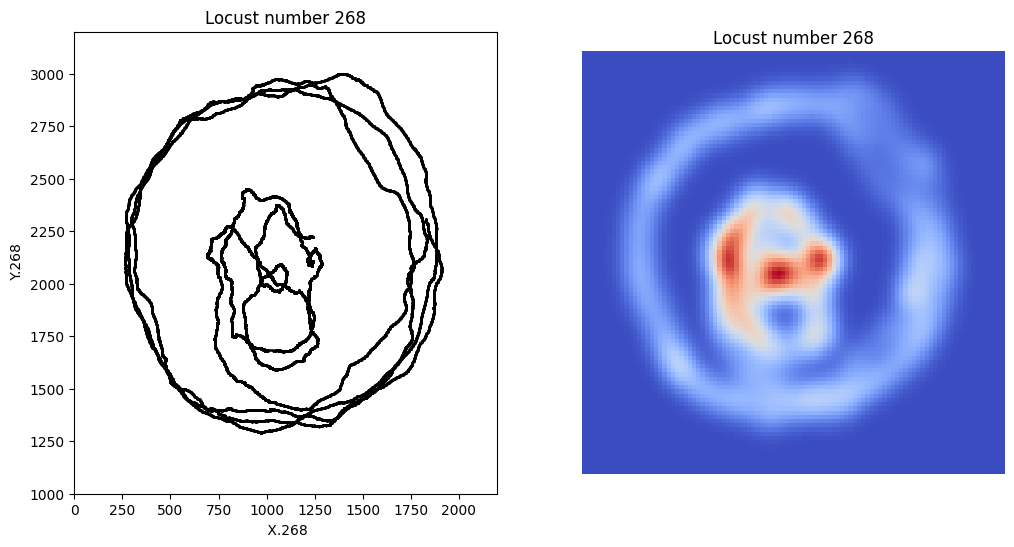

CPU times: total: 16.7 s
Wall time: 16.8 s


In [21]:
%%time
# Let's plot the trajectory of a random locust. 

# First, let's set up some reasonable min and max values for the x and y axes.
xmin = 0
xmax = 2200
ymin = 1000
ymax = 3200

# We choose a random locust using random.choice(locust_labels). 
LocustNumber = random.choice(locust_labels)

# Let us choose which part of the dataframe we are actually interested in plotting. 
# We will take only the part of ndf containing the columns corresponing to ' X.LocustNumber', ' Y.LocustNumber', ' Z.LocustNumber', and call this new dataframe plot_df
plot_df = ndf[[f' X.{LocustNumber}', f' Y.{LocustNumber}', f' Z.{LocustNumber}']]



# Plotting in matplotlib is a fairly standard exercise. You can play around with some of these options if you like.
# Each matplotlib plot needs a fig and an ax.
fig = plt.figure(figsize=(12,6))

# This begins the first plot
ax = plt.subplot(121)

# Now that we have the dataframe we are interested in plotting, we can make a scatter plot of it from the following command. 
plot_df.plot.scatter(x=f' X.{LocustNumber}', y=f' Y.{LocustNumber}', c='Black', s=0.5, ax=ax )
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_title(str("Locust number " + str(LocustNumber)))



# This begins the second plot
ax = plt.subplot(122)

datax = plot_df[f' X.{LocustNumber}'].dropna()
datay = plot_df[f' Y.{LocustNumber}'].dropna()
values = np.vstack((datax, datay))
kernel = stats.gaussian_kde(values)

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

ax.imshow(np.rot90(Z), cmap = sns.color_palette("coolwarm", as_cmap=True),
          extent=[xmin, xmax, ymin, ymax])


ax.set_title(str("Locust number " + str(LocustNumber)))
plt.axis('off')



plt.show()


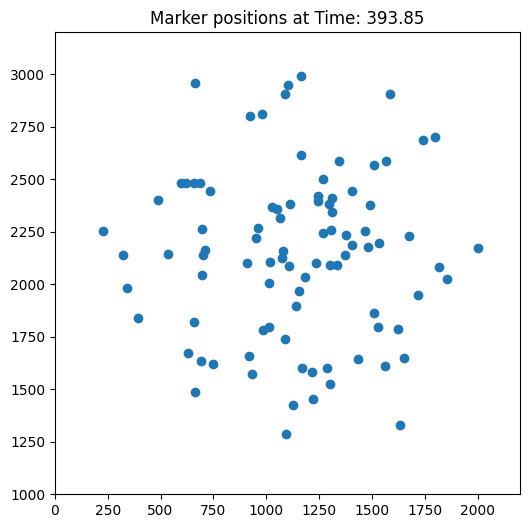

In [22]:
# What about all of the locusts at a given time?
# First, choose a time
RandomTime = round(random.uniform(0, max(ndf.index)),2)

X_subset = [f' X.{label}' for label in locust_labels]
Y_subset = [f' Y.{label}' for label in locust_labels]
Z_subset = [f' Z.{label}' for label in locust_labels]
X_frame_df = ndf.loc[RandomTime][X_subset].dropna()
Y_frame_df = ndf.loc[RandomTime][Y_subset].dropna()
Z_frame_df = ndf.loc[RandomTime][Z_subset].dropna()

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

plt.scatter(X_frame_df, Y_frame_df)

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

plt.title(f'Marker positions at Time: {RandomTime}')

plt.show()

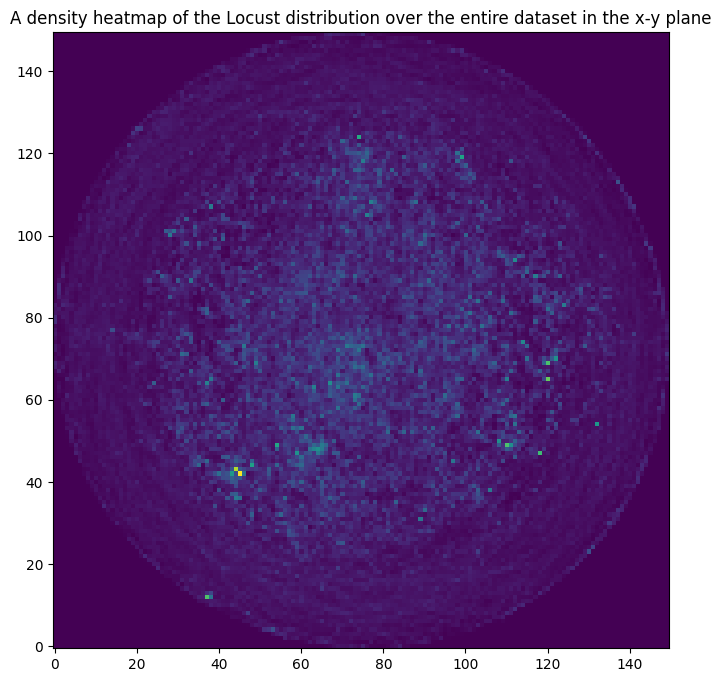

In [23]:
# Let's see a density heatmap of the locusts in the arena.

X_df = ndf[X_subset].to_numpy()
Y_df = ndf[Y_subset].to_numpy()
Z_df = ndf[Z_subset].to_numpy()




heatmap, xedges, yedges = np.histogram2d(X_df[~np.isnan(X_df)], Y_df[~np.isnan(Y_df)], bins=150)


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)




plt.title('A density heatmap of the Locust distribution over the entire dataset in the x-y plane')
plt.imshow(heatmap.T, origin='lower')
plt.show()

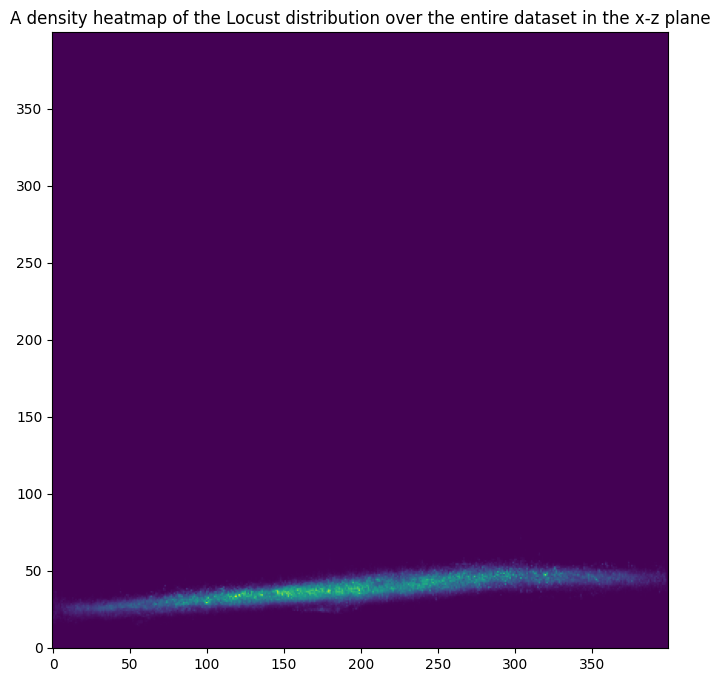

In [24]:
heatmap, xedges, yedges = np.histogram2d(X_df[~np.isnan(X_df)], Z_df[~np.isnan(Y_df)], bins=400)


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)




plt.title('A density heatmap of the Locust distribution over the entire dataset in the x-z plane')
plt.imshow(heatmap.T, origin='lower')
plt.show()

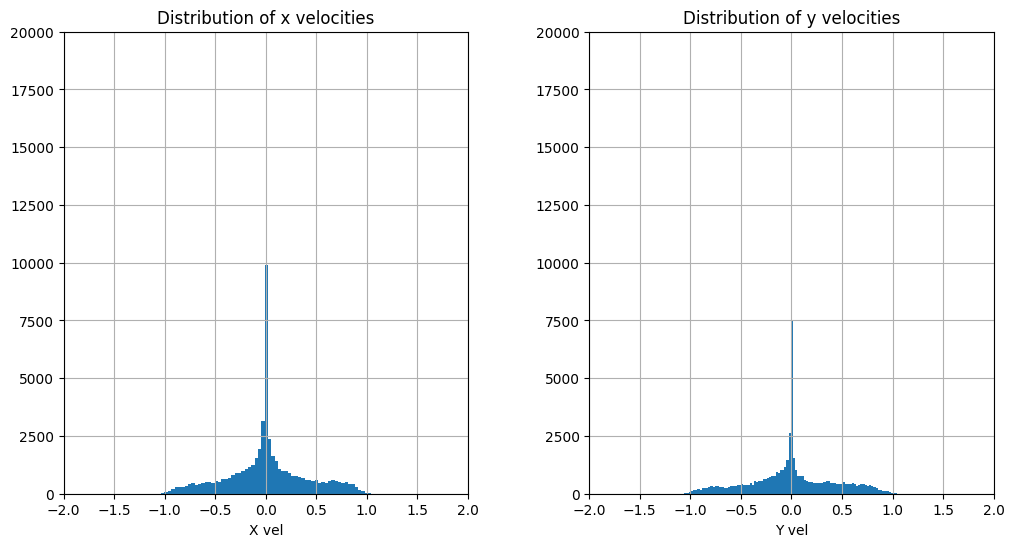

In [25]:
# Let's graph the distribution of the x and y velocities now. We will start with just a single locust, and then graph the distribution for all the locusts. 

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)

ax.set_xlabel('X vel')
ndf.hist(ax = ax, column=f'V X.{LocustNumber}', bins=100)
plt.title('Distribution of x velocities')
ax.set_xlim((-2,2))
ax.set_ylim((0,20000))


ax = plt.subplot(122)

ax.set_xlabel('Y vel')

ndf.hist(ax = ax, column=f'V Y.{LocustNumber}', bins=100)
plt.title('Distribution of y velocities')
ax.set_xlim((-2,2))
ax.set_ylim((0,20000))

plt.show()

In [26]:
# The distribution is, notably, not a normal distribution. Is it the sum of two normal distributions, both with mean zero but one with a much lower variance?

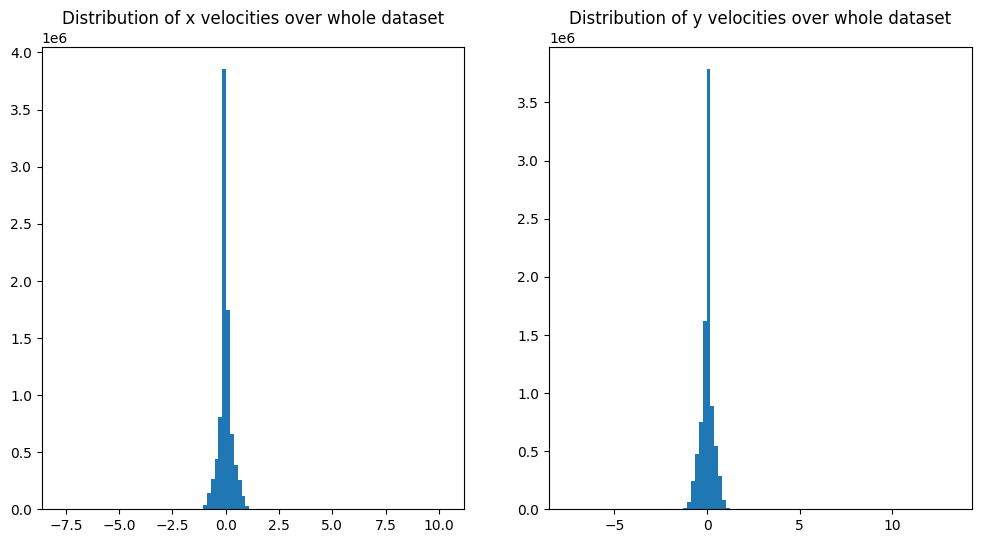

In [27]:
# We can similarly calculate the distributions over the entire dataset, rather than just one locust.
x_vel_df = ndf[[f'V X.{label}' for label in locust_labels]]
y_vel_df = ndf[[f'V Y.{label}' for label in locust_labels]]

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
plt.title('Distribution of x velocities over whole dataset')


plt.hist(x_vel_df.to_numpy().flatten(), bins=100)


ax = plt.subplot(122)
plt.hist(y_vel_df.to_numpy().flatten(), bins=100)
plt.title('Distribution of y velocities over whole dataset')

plt.show()

In [28]:
# The distribution is heavily peaked at zero, suggesting perhaps that most of the markers spend their time stationary. 

In [29]:
# Let us now look at the distribution of speeds

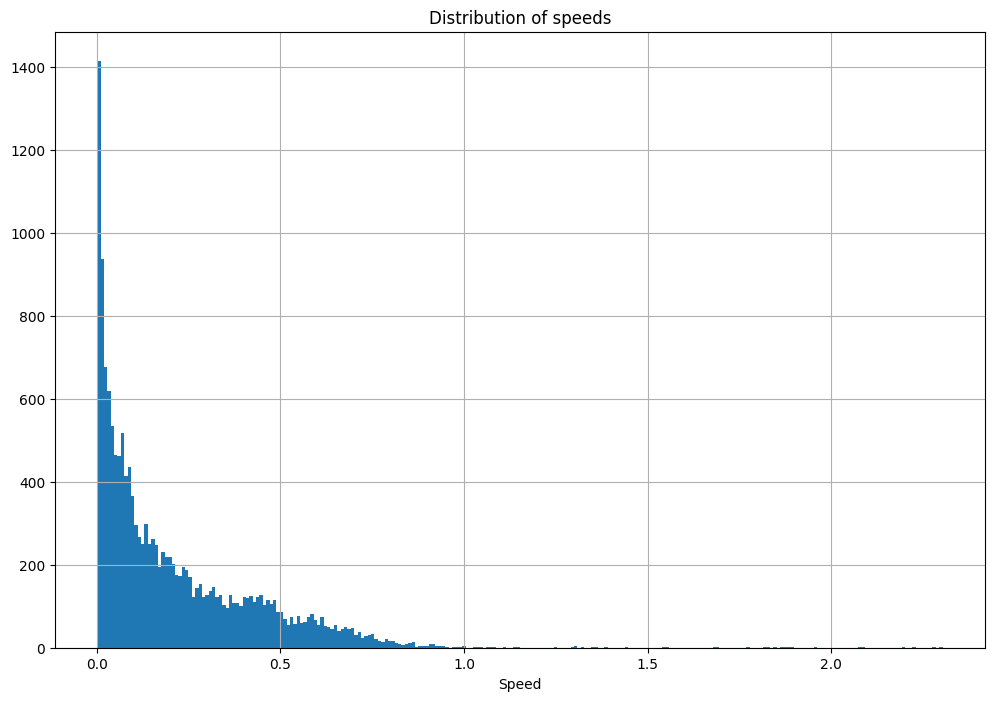

In [30]:
# For a single locust, we have
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.set_xlabel('Speed')

ndf.hist(ax = ax, column='speed 1111', bins=250)
plt.title('Distribution of speeds')
plt.show()

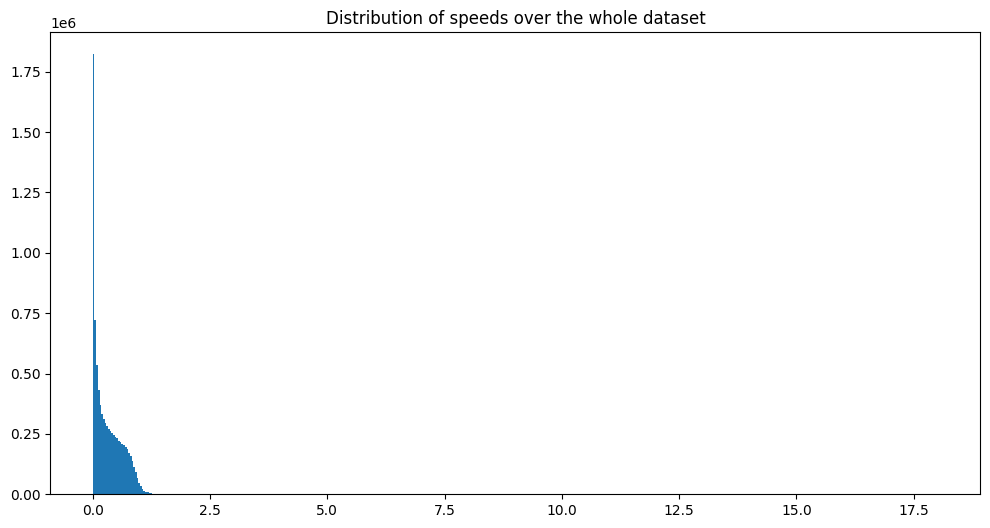

In [31]:
# For the entire dataset
speed_df = ndf[[f'speed {label}' for label in locust_labels]]


fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)

plt.hist(speed_df.to_numpy().flatten(), bins=500)
plt.title('Distribution of speeds over the whole dataset')

plt.show()

In [32]:
# A potential problem I have noticed during this analysis is that in any given frame, the number of markers which are not tracked is quite high (approiximately 64%)
# This is true even once we have removed most of the spurious tracklets. We should investigate this!

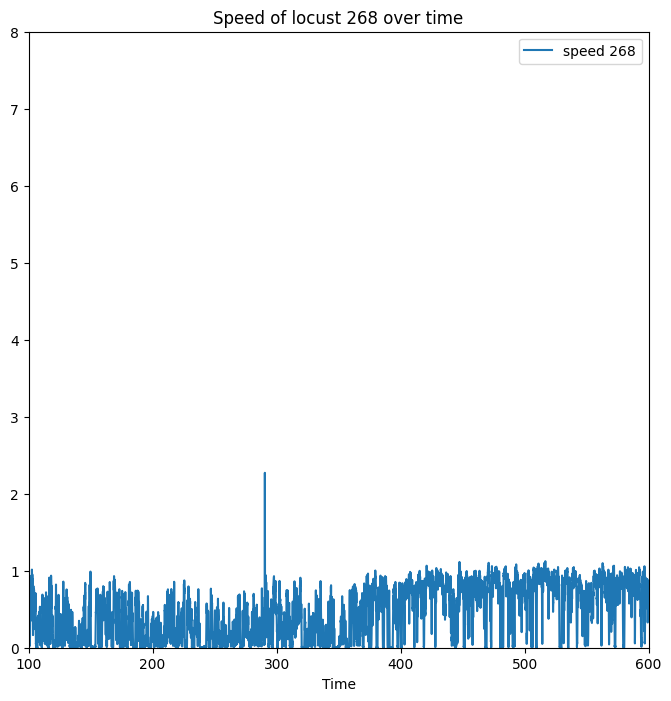

In [33]:
# Let's finally take a look at how the speed of a locust varies over time
# We will use the same locust from before, LocustNumber. We can use the speed_df dataframe we defined for the previous calculations

fig, ax = plt.subplots()
fig.set_size_inches(8,8)


speed_df.plot(y = f'speed {268}', use_index=True, ax=ax)
plt.title(f'Speed of locust {268} over time')

ax.set_xlim((100,600))
ax.set_ylim((0,8))

#fig.savefig("speed268b.jpg")
plt.show()

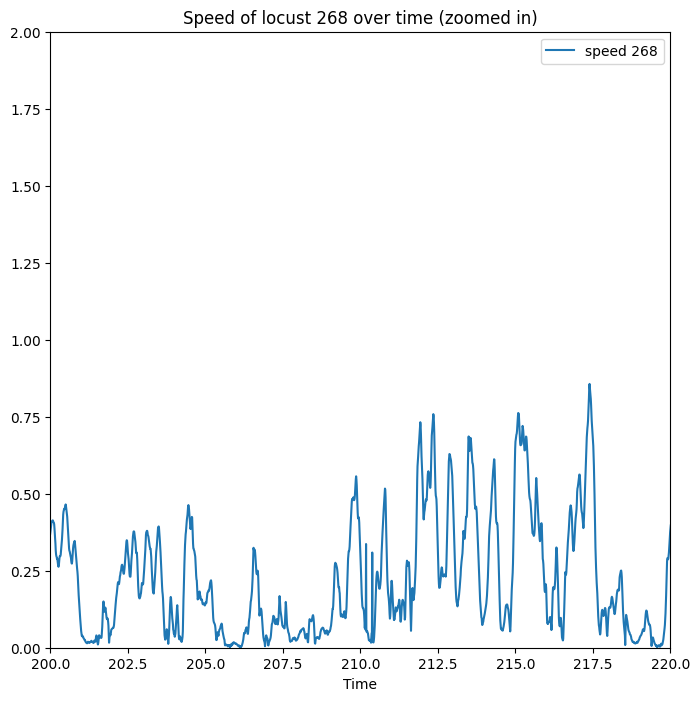

In [34]:
# Zooming in a bit, we see that the speed is quite messy

fig, ax = plt.subplots()
fig.set_size_inches(8,8)


speed_df.plot(y = f'speed {LocustNumber}', use_index=True, ax = ax)

plt.title(f'Speed of locust {LocustNumber} over time (zoomed in)')
ax.set_xlim(200,220)
ax.set_ylim(0,2)

plt.show()

In [35]:
# How about the average speed of the locusts over time? Does that look smoother?
# We can calculate the average speed easily by adding a new column to the speed_df dataframe
speed_df = ndf[[f'speed {label}' for label in locust_labels]]
speed_df['mean'] = speed_df.mean(axis=1)
speed_df['median'] = speed_df.median(axis=1)
speed_df

,speed 3,speed 4,speed 8,speed 10,speed 11,speed 12,speed 13,speed 16,speed 17,speed 18,...,speed 1112,speed 1118,speed 1121,speed 1125,speed 1146,speed 1154,speed 1158,speed 1160,mean,median
Time,,,,,,,,,,,,,,,,,,,,,
0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


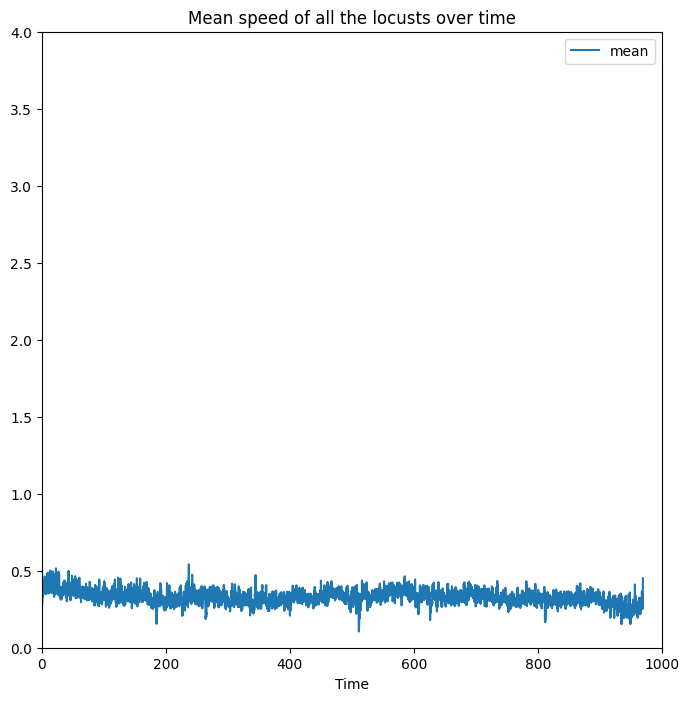

In [36]:
# The graph of the mean looks already a bit smoother
fig, ax = plt.subplots()
fig.set_size_inches(8,8)


speed_df.plot(y = 'mean', use_index=True, ax=ax)
plt.title('Mean speed of all the locusts over time')

ax.set_ylim((0,4))
ax.set_xlim((0,1000))

#fig.savefig("meanspeedb.jpg")
plt.show()

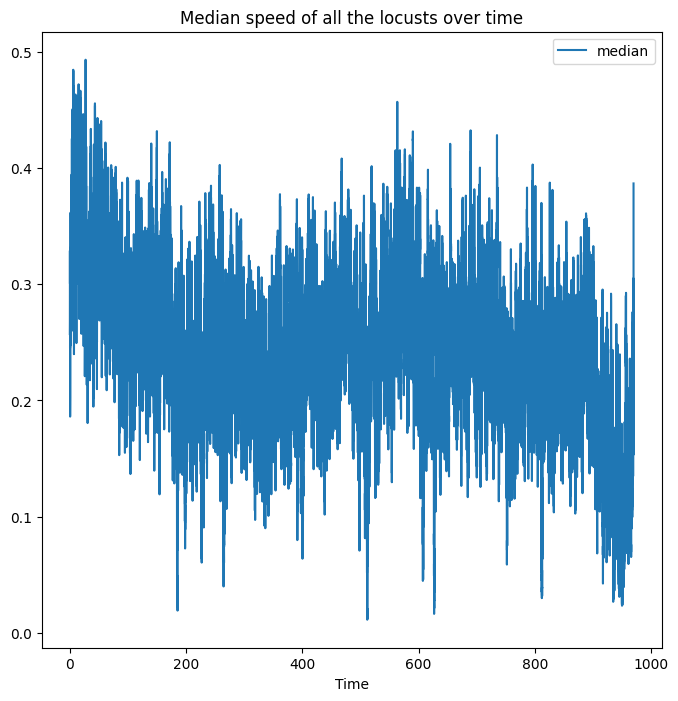

In [37]:
# The median is a measure of the average which is less sensitive to outliers. We see that this is smoother than the mean.
fig, ax = plt.subplots()
fig.set_size_inches(8,8)


speed_df.plot(y = 'median', use_index=True, ax=ax)
plt.title('Median speed of all the locusts over time')
plt.show()

In [38]:
# Note the large spike at the end. What do you think caused that?